# chapter 10 - Stochastics
확률과정

In [1]:
# 난수를 생성
# 시뮬레이션
# 가치평가
# 위험측도 
# VaR (Value-at-Risk) 확률적 신뢰도를 기반한, 특정시간 발생가능한 손실가능금액
# CVA (Credit Value Adjustment) 파산위험을 반영한 위험측도
# CVaR (Conditional Value At Risk) 위험값과 위험을 초과하는 손실 사이를 가중평균한 값

<br></br>
## 1 난수 생성
Random Numbers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 01 ndarray 객체로 난수생성
np.random.rand(1dim, 2dim....)

In [3]:
# Default : 평균 0, 분산 1 범위 난수를 생성
np.random.rand(3)

array([ 0.87067944,  0.65434888,  0.14724679])

In [4]:
np.random.rand(3,3)

array([[ 0.49053866,  0.19334551,  0.69064444],
       [ 0.65376474,  0.51342702,  0.05311966],
       [ 0.14375122,  0.49810823,  0.19899097]])

In [5]:
np.random.rand(3,3,3)

array([[[ 0.32752234,  0.18045768,  0.12709538],
        [ 0.17451445,  0.97372601,  0.52341301],
        [ 0.23812664,  0.89997446,  0.28939793]],

       [[ 0.35864213,  0.70481602,  0.23721859],
        [ 0.99106134,  0.46917513,  0.21891545],
        [ 0.00875769,  0.15162615,  0.67645525]],

       [[ 0.92338045,  0.78960361,  0.39175262],
        [ 0.15870974,  0.82911647,  0.22673375],
        [ 0.47805548,  0.24534563,  0.28783202]]])

In [6]:
# 구간난수 생성
# np.random.rand(3) * (max - min) + min
# min(3) ~ max(9) 사이의 난수를 생성
a = 3.
b = 9.
np.random.rand(3) * (b - a) + a

array([ 5.68085929,  7.71886266,  4.28990205])

In [7]:
# 브로드캐스팅을 활용한 난수생성
np.random.rand(3, 3) * (b - a) + a

array([[ 8.90542013,  3.07455705,  8.60696616],
       [ 6.84662331,  4.27329681,  3.37146966],
       [ 5.12095362,  4.99277856,  3.86367896]])

In [8]:
np.random.randint(10, size=10)

array([4, 0, 8, 8, 5, 1, 4, 1, 9, 5])

### 02 ndarray 여러타입 난수 비교
np.random

In [9]:
sample_size = 500
rn1 = np.random.rand(sample_size, 3)
rn2 = np.random.randint(0, 10, sample_size)
rn3 = np.random.sample(size=sample_size)

a = [0, 25,50, 75, 100]
rn4 = np.random.choice(a, size=sample_size)

import matplotlib
matplotlib.rc('font', family='NanumGothic')

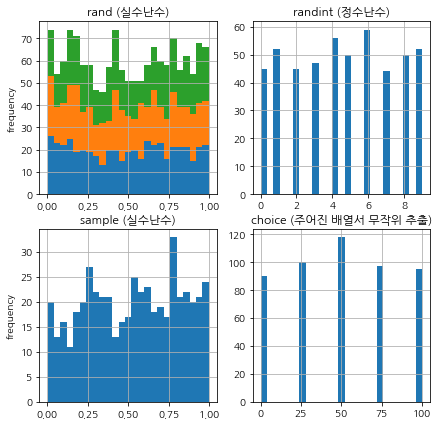

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (7, 7))
 
ax1.set_title('rand (실수난수)')
ax1.hist(rn1, bins = 25, stacked = True); ax1.set_ylabel('frequency'); ax1.grid(True)

ax2.set_title('randint (정수난수)')
ax2.hist(rn2, bins = 25); ax2.grid(True)                  

ax3.set_title('sample (실수난수)'); ax3.hist(rn3, bins = 25); 
ax3.set_ylabel('frequency'); ax3.grid(True)                  

ax4.set_title('choice (주어진 배열서 무작위 추출)')
ax4.hist(rn4, bins = 25); ax4.grid(True)

In [11]:
# 결론
# 아직까지도 정규분포, 로그정규분포에 많이 의존하는 모델로 시뮬레이션을 진행한다.

In [12]:
sample_size = 500
rn1 = np.random.standard_normal(sample_size)
rn2 = np.random.normal(100, 20, sample_size)
rn3 = np.random.chisquare(df=0.5, size=sample_size)
rn4 = np.random.poisson(lam=1.0, size=sample_size)

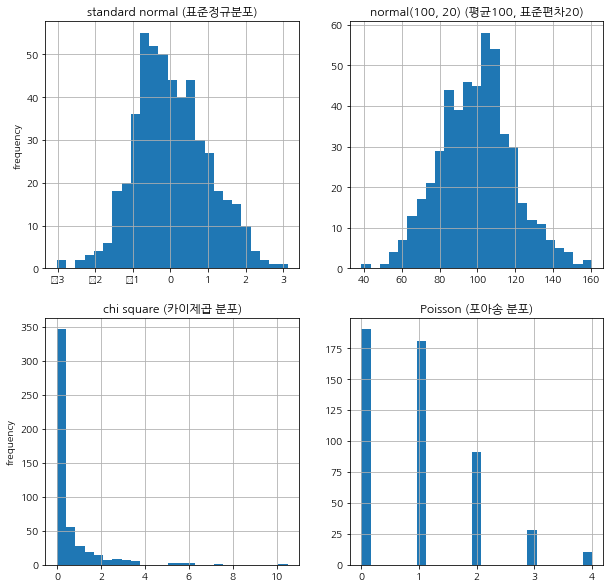

In [13]:
# Pseudo-random numbers from different distributions
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax1.set_title('standard normal (표준정규분포)')
ax1.hist(rn1, bins=25); ax1.set_ylabel('frequency'); ax1.grid(True)

ax2.set_title('normal(100, 20) (평균100, 표준편차20)')
ax2.hist(rn2, bins=25); ax2.grid(True)

ax3.set_title('chi square (카이제곱 분포)')
ax3.set_ylabel('frequency'); ax3.hist(rn3, bins=25); ax3.grid(True)

ax4.set_title('Poisson (포아송 분포)')
ax4.hist(rn4, bins=25); ax4.grid(True)

In [14]:
# 개념정리
# 포아송 분포 : 일정한 시간내 발생횟수 계산으로, 특이한 사건 발생분포를 시뮬레이션에 적합
# 카이제곱 분포 : 독립된 k개 (K:자유도)의 표준정규분포를 제곱해서 얻은 분포로 (출처:위키)
#              람다 계수가 1이다

<br></br>
## 2 시뮬레이션
Simulation

### 01 확률변수 모형
블랙-숄즈-머튼 모형을 이용한 미래의 주가 시뮬레이션

In [15]:
# Data 생성하기
S0 = 100      # 초기값
r = 0.05      # 고정 단기 이자율
sigma = 0.25  # 고정 변동성
T = 2.0       # in years
I = 10000     # 생성할 난수의 갯수

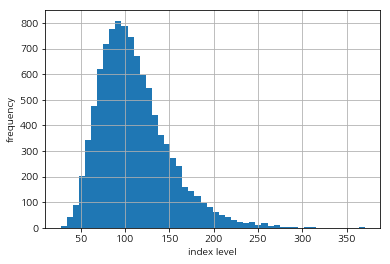

In [16]:
# Standard_Normal 함수를 사용한 '브라운 운동모형' 생성
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * np.random.standard_normal(I))

plt.hist(ST1, bins = 50)     # bins : 50개 구간으로 범주화
plt.xlabel('index level')
plt.ylabel('frequency'); plt.grid(True)

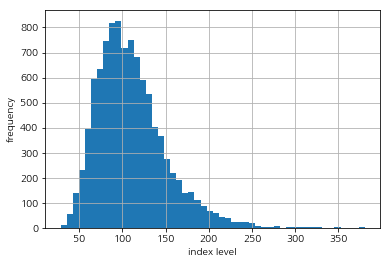

In [17]:
# Log_Normal 함수를 사용한 브라운 운동모형
ST2 = S0 * np.random.lognormal((r - 0.5 * sigma ** 2) * T,
                          sigma * np.sqrt(T), size = I)
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

### 02 확률변수 모형의 검증
통계 모멘트를 비교

In [18]:
import scipy.stats as scs
def print_statistics(a1, a2):   # a1, a2 : ndarray objects
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print("%14s %14s %14s" % ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4]))
    print("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

In [19]:
# 통계적 요약 내용을 출력
# scs.describe(ST1)
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.247         28.565
           max        370.692        380.645
          mean        110.402        110.471
           std         39.627         40.132
          skew          1.086          1.135
      kurtosis          2.021          2.358


<br></br>
## 3 확률과정
확률변수를 반복해서 시뮬레이션 한다

단, 각단계의 샘플은 이전단계의 연산결과에 의존한다

처음부터가 아닌 직전의 값들만 영향을 미치는 Markov 특성을 갖는다

이를 무기억성 확률과정(memoryless) 라고 한다

### 01 기하 브라운 운동모형
Geometric Brownian Motion

미분확률 방정식에 따르는 '블랙 숄즈 머튼'모형을 뜻한다

확률미분방정식은 연속성을 갖으므로,'시간별 이산화'는 '오일러 방법'을 적용해야 한다

In [20]:
# parameter 정의
I = 10000     # 생성할 난수의 갯수
M = 50        # 총 시뮬레이션 횟수 
T = 2.0       # in years
dt = T / M    # 이산화 할 시간간격
S = np.zeros((M + 1, I))
S[0] = S0     # 초기값 설정

for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * np.random.standard_normal(I))
S.shape

(51, 10000)

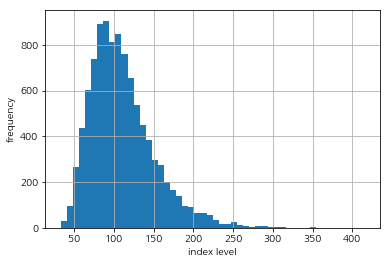

In [21]:
# Simulated geometric Brownian motion at maturity
plt.hist(S[-1], bins=50)
plt.xlabel('index level'); plt.ylabel('frequency'); plt.grid(True)

In [22]:
# 결과
# 로그분포 (ST2)와 동일한 패턴을 나타냄을 알 수 있다
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.510         28.565
           max        415.953        380.645
          mean        110.318        110.471
           std         40.695         40.132
          skew          1.182          1.135
      kurtosis          2.417          2.358


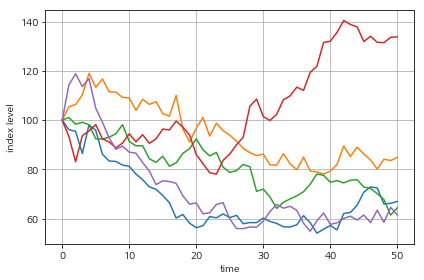

In [23]:
# 시뮬레이션 10개의 과정을 화면에 출력
plt.plot(S[:,:5], lw=1.5)
plt.xlabel('time'); plt.ylabel('index level')
plt.grid(True); plt.tight_layout()

### 02 제곱근 확산 모형
콕스-잉거솔-로스 모형 (Cox-Ingersoll & Ross)의 제곱근 확산모형 (Square-root diffusion)

#### 1) 제곱근 확산모형의 '오일러 방식' 이산화
단기 이자율, 변동성 모형에 사용되는 평균회귀과정 적용

In [24]:
# 이산화 : 일정범위를 구간으로 나눔 (연속형 자료의 범주화)
# 근사화 : 정규분포 형태로 변환 (정규화와 비슷한 듯)

# 단기 이자율 모형의 시뮬레이션을 위한 파라미터 설정
x0 = 0.05    
kappa = 3.0
theta = 0.02
sigma = 0.1

# parameter 정의
I = 10000
M = 50
dt = T / M

In [25]:
# '오일러방식'을 사용한 제곱근 확산모형
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
              + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
              + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)  
              * np.random.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

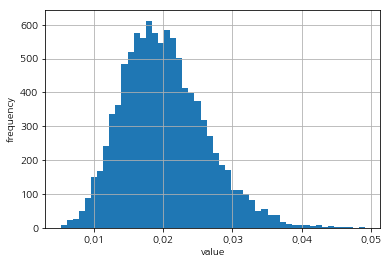

In [26]:
# Simulated square-root diffusion at maturity (Euler scheme)
# 히스토그램 시각화
plt.hist(x1[-1], bins=50)
plt.xlabel('value'); plt.ylabel('frequency')
plt.grid(True)

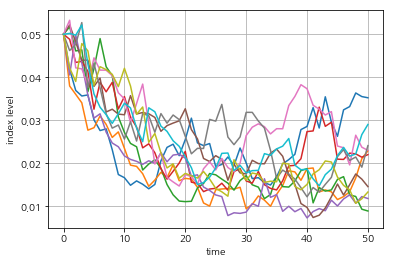

In [27]:
# Simulated square-root diffusion paths (Euler scheme)
# 현재값이, 장기평균(3년국채 이자율) 0.02보다 높으므로, 
# 표류경향(drift)은 음수가 되고, 장기평균으로 수렴함을 알 수 있다
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time'); plt.ylabel('index level')
plt.grid(True)

#### 2) 제곱근 확산모형의 '카이제곱분포' 이산화
자유도와 비중심인수를 갖는 '카이제곱분포'로 재정의

In [28]:
# 카이제곱분포를 활용한 제곱근 확산모형
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1] 
        x2[t] = c * np.random.noncentral_chisquare(df, nc, size=I)
    return x2

x2 = srd_exact()

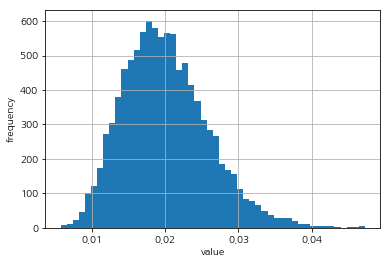

In [29]:
# Simulated square-root diffusion at maturity (exact scheme)
plt.hist(x2[-1], bins=50)
plt.xlabel('value'); plt.ylabel('frequency')
plt.grid(True)

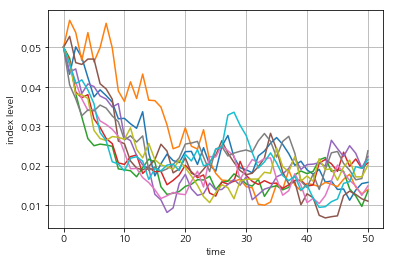

In [30]:
# Simulated square-root diffusion paths (exact scheme)
# 음표류경향과, sigma로 수렴함을 관찰가능하다
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time'); plt.ylabel('index level')
plt.grid(True)

#### 3)  1번 모델과 2번 모델의 비교
Cox-Ingersoll & Ross's Square-root diffusion

In [31]:
# 제곱근 확산모형의 결과는 비슷하다
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.006
           max          0.049          0.047
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.553          0.578
      kurtosis          0.407          0.485


In [32]:
# 카이제곱서 샘플링시 속도저하가 크다
I = 250000
%time x1 = srd_euler() # 오일러 방식으로 이산화
%time x2 = srd_exact() # 카이제곱 분포로 이산화

CPU times: user 740 ms, sys: 72 ms, total: 812 ms
Wall time: 746 ms
CPU times: user 1.57 s, sys: 4 ms, total: 1.58 s
Wall time: 1.58 s


### 03 확산적 변동성 모형
Stochastic Volatility

In [33]:
# BSM 모델의 한계는, Beta 값이 일정한 경우를 가정한다
# '헤스톤 모형': 확률적 변동성 모형(Stochastic Volatility)을 도입
# 레버리지 효과를 반영한다 : 시장하락시 변동성 증가, 시장 상승시 변동성 감소한다

S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [34]:
# 상관관계행렬(correlation matrix)에 
# 숄레스키 분해(Cholesky Decomposition) Matrix
# 숄레스키 분해 : Matrix를 인수분해하는 것인데, 그냥 'Matrix'에 root(제곱근)를 씌운 결과
# (물론 Matrix에 root를 씌우면 그 결과도 Matrix의 형태가 됩니다.)라고 생각하시면 쉽습니다.

corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)  # 숄레스키 분해
cho_mat

array([[ 1. ,  0. ],
       [ 0.6,  0.8]])

In [35]:
# 시뮬레이션에 사용할 parameter를 설정
M = 50
I = 10000
ran_num = np.random.standard_normal((2, M + 1, I))

In [36]:
# 제곱근 확산모형에 기반한 변동성 과정은
# '오일러 이산화 방식'을 적용한다 (성능은 비슷하나 속도가 빠름)
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
          + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)  
          * ran[1])
v = np.maximum(vh, 0)

In [37]:
# 주가 변동과정도, 상관관계를 고려한 
# 기하 브라운 운동을 '오일러 방식'으로 이산화 한다
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

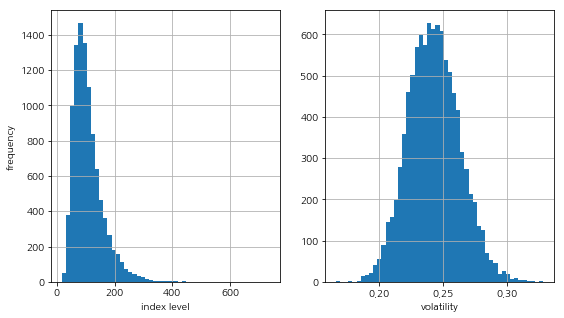

In [38]:
# 오일러 방식의 장점
# 표준정규분포를 사용하여 상관관계가 간단하고 일괄적용이 가능하다
# 반면, 카이제곱은 상관관계를 일관성있게 적용하기 힘들다

# 주가와 변동성 두확률 과정의 시뮬레이션 결과를 히스토그램으로 출력
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level'); ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility'); ax2.grid(True)

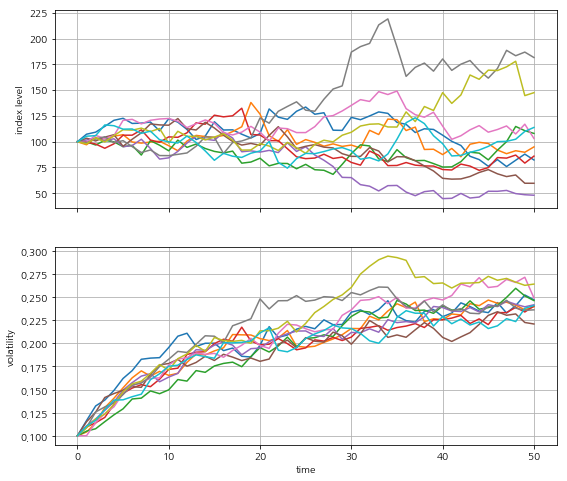

In [39]:
# 확률 과정의 10개 시뮬레이션 결과출력
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9, 8))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level'); ax1.grid(True)

# 변동성 과정은 0.25로 수렴
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time'); ax2.set_ylabel('volatility'); ax2.grid(True)
# Simulated stochastic volatility model paths

In [40]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         17.303          0.166
           max        736.861          0.328
          mean        108.511          0.243
           std         52.957          0.020
          skew          1.851          0.200
      kurtosis          7.680          0.060


### 04 점프 확산
Jump-Diffusion

In [41]:
# 자산가격이나, 변동성이 점프하는 현상이 종종 관찰된다
# 이를 반영한 BSM 모델로써 '점프확산'(jump diffusion) 모형을 발표하였다

In [42]:
# 파라미터 설정
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6     # 점프의 평균에 큰 음수를 가정 (정규분포보다 우편향)
delta = 0.25
T = 1.0

In [43]:
M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0

In [44]:
sn1 = np.random.standard_normal((M + 1, I))
sn2 = np.random.standard_normal((M + 1, I))
poi = np.random.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

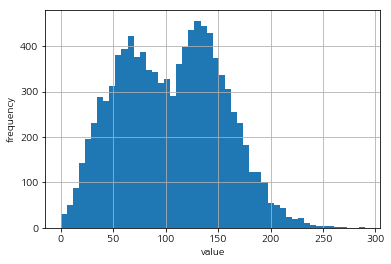

In [45]:
# 접프 확산모형을 '히스토그램'으로 출력
plt.hist(S[-1], bins=50)
plt.xlabel('value');plt.ylabel('frequency'); plt.grid(True)

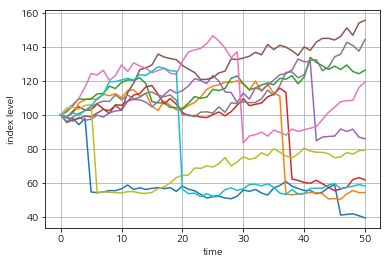

In [46]:
# Simulated jump diffusion paths : 10개의 시뮬레이션 결과를 출력
# 주가가 아래쪽으로 검프하는 현상을 관찰가능하다
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time'); plt.ylabel('index level'); plt.grid(True)

<br></br>
## 4 분산 감소
Variance Reduction

In [47]:
# np.random.seed(1000) : 난수생성 기준을 고정 후 반복생성
# 반복 횟수가 클수록, 평균 0 수렴, 분산 1 수렴 (정규화)
print("%15s %15s" % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    np.random.seed(1000)
    sn = np.random.standard_normal(i ** 2 * 10000)
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))
    
i ** 2 * 10000

           Mean  Std. Deviation
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


8410000

### 01 대조변수 (antithetic variates)를 사용
난수를 원하는 절반만 생성하고, 나머지는 부호를 반대로 복/붙

In [48]:
# 표준정규분포를 개선하는 분산감소 방법이 존재
sn = np.random.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))
np.shape(sn)

(10000,)

In [49]:
print("%15s %15s" % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    np.random.seed(1000)
    sn = np.random.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [50]:
# 결론
# 바로 1회부터 평균은 0으로 수렴된다.

### 02 모멘트 정합
Moment Matching

In [51]:
sn = np.random.standard_normal(10000)
sn.mean()

-0.001165998295162494

In [52]:
sn.std()

0.99125592020460496

In [53]:
sn_new = (sn - sn.mean()) / sn.std()
sn_new.mean()

-2.3803181647963357e-17

In [54]:
sn_new.std()

0.99999999999999989

In [55]:
# 분산감소방법을 활용한 표준정규분포 난수생성기
# M : 이산화 구간의 갯수 (integer)
# I : 시뮬레이션 횟수 (integer)
# anti_paths = True : 대조변수 사용 (boolean)
# mo_match = True : 모멘트 정합 사용 (boolean)

def gen_sn(M, I, anti_paths=True, mo_match=True): 
    if anti_paths is True:
        sn = np.random.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = np.random.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

gen_sn(M,I)

array([[ 0.83259781,  1.02328643,  0.15821618, ...,  1.84916422,
         0.41732035, -0.15682406],
       [ 0.17543294,  0.46816674, -0.06633836, ..., -0.5071587 ,
        -0.98350549,  0.12616592],
       [-1.96430571,  1.47446102,  0.24255949, ...,  0.02467741,
         1.25241378,  0.82180231],
       ..., 
       [ 0.76934296, -0.17359342, -0.14246721, ...,  0.21030476,
        -0.07327105,  0.9476135 ],
       [ 0.09193061, -0.82497292, -0.9372698 , ...,  0.91753719,
         0.38755116,  0.97356457],
       [-0.61663611,  0.08116784,  0.0177379 , ...,  0.05207249,
        -1.29867552, -0.95898492]])

<br></br>
## 5 가치평가 1 - 유러피안 옵션
몬테카를로 시뮬레이션 : 조건부 청구권의 가치를 평가한다

### 01 '기하 브라운 운동' 인수값을 활용한 유러피안 옵션
BSM모델로 몬테카를로 시뮬레이션을 시행

In [56]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

In [57]:
# Parameter
# K : 옵션의 행사가 (float)
# Return
# C0 : 유러피안콜옵션 현재가치 추정치 (float)

def gbm_mcs_stat(K):
    sn = gen_sn(1, I)
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T  # 만기의 가격을 시뮬레이션
                 + sigma * np.sqrt(T) * sn[1])
    hT = np.maximum(ST - K, 0)                   # 만기의 payoff를 계산
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)     # 몬테카를로 추정을 계산 (MCS estimator)
    return C0

gbm_mcs_stat(K = 105.)

10.071005602215465

In [58]:
# 결론
# 위파라미터를 바탕으로 1년 만기시 옵션의 가격을 계산한다

### 02 '동적 시뮬레이션' 방식을 활용한 유러피안 옵션
BSM모델로 몬테카를로 시뮬레이션을 시행

In [59]:
# Parameters
# K : 옵션 행사가격 (+ float)
# option : 옵션의 유형 ('call', 'put')
# Returns
# C0 : 유러피안 콜옵션 만기시 추정가격 (float)
M = 50

In [60]:
def gbm_mcs_dyna(K, option='call'):
    dt = T / M
    S = np.zeros((M + 1, I))          # 주가경로 시뮬레이션
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    if option == 'call':              # 옵션 유형에 따른 payoff의 계산
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT) # MCS estimator
    return C0

In [61]:
print('Call :',gbm_mcs_dyna(K=105., option='call'))
print('Put  :',gbm_mcs_dyna(K=105., option='put'))

Call : 9.96736017669
Put  : 9.84090155796


### 03 '정적 시뮬레이션' 방식을 활용한 유러피안 옵션
BSM모델로 몬테카를로 시뮬레이션을 시행

In [62]:
# 기타 BSM 모델을 활용한 상대옵션가격 연산함수들
# Analytical Black-Scholes-Merton (BSM) Formula

In [63]:
# Parameters  
# S0 : 최초 가격 (float)
# K : 행사가격 (float)
# T : 만기기간 (float)
# r : 무위험 확률 (float)
# sigma : 변동성 Beta 값 (float)
# Returns
# value : 만기시 콜옵션 가격 (float)

def bsm_call_value(S0, K, T, r, sigma):
    from math import log, sqrt, exp
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    # stats.norm.cdf --> 정규분포를 누적분포로 변환
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)
            - K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

In [64]:
stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80., 120.1, 5.)
np.random.seed(200000)

In [65]:
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

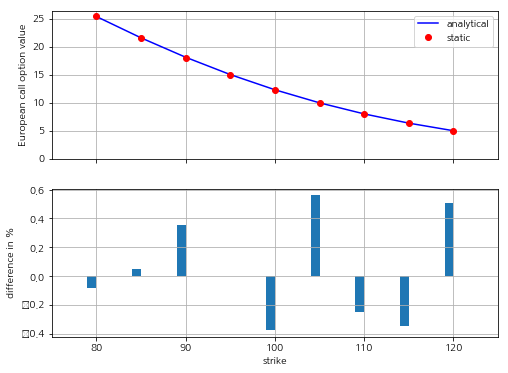

In [66]:
# 정적방식과 동적방식의 시뮬레이션 해석해 비교
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.grid(True); ax1.legend(loc=0); ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike'); ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125); ax2.grid(True)

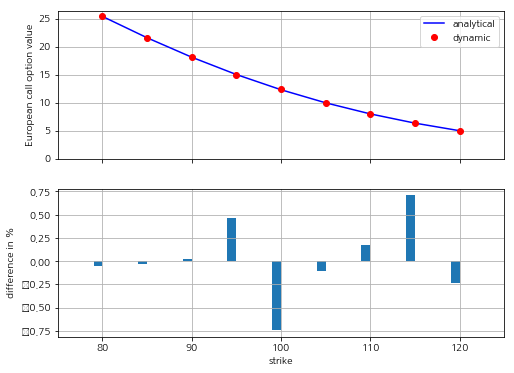

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.grid(True); ax1.legend(loc=0); ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike'); ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125); ax2.grid(True)

In [68]:
# 오차가 + 영역과 - 영역 모두에 출현한다
# 품질관리 : M (시간 간격의 수), I (시뮬레이션 반복횟수) 로 조절한다

In [69]:
# Parameters
# S0 : 초기가격 (float)
# K : 행사가격 (float)
# T : 만기기간 (float)
# r : 무위험 이율 (float)
# sigma : 변동성 beta 값 (float)
# Returns
# vega : 만기시 가격 (float)  
# partial derivative of BSM formula with respect to sigma, i.e. Vega

def bsm_vega(S0, K, T, r, sigma):
    from math import log, sqrt
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

In [70]:
# Implied volatility function
# Parameters
# S0 : 초기가격 (float)
# K : 행사가격 (float)
# T : 만기기간 (float)
# r : 무위험 이율 (float)
# sigma_est : 변동성 예측값 (float)
# it : iterations(반복자)의 갯수 (integer)
# Returns
# simga_est : 예측결과값 (float)

def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0)
                        / bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est

<br></br>
## 6 가치평가 2 - 아메리칸 옵션
'최적정치문제'를 추가적으로 풀어야 한다

In [71]:
# Parameters
# K : 옵션 행사가격 (float)
# option : 옵션의 종류 ('call', 'put')
# Returns
# C0 : 옵션가격 추정치 (float)

In [72]:
def gbm_mcs_amer(K, option='call'):
    dt = T / M
    df = np.exp(-r * dt)
    S = np.zeros((M + 1, I)) # 주가 시뮬레이션
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # 옵션 종류에 따른 함수적용
    if option == 'call':  h = np.maximum(S - K, 0)
    else:                 h = np.maximum(K - S, 0)
    # LSM 알고리즘
    V = np.copy(h)
    for t in range(M - 1, 0, -1):  
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    C0 = df * 1 / I * np.sum(V[1]) # MCS 시뮬레이션
    return C0

In [73]:
# 조기행사 프리미엄 : 두 옵션의 가격차이 
print('Call :', gbm_mcs_amer(110., option='call'))
print('Put  :',gbm_mcs_amer(110., option='Put'))

Call : 7.77893327945
Put  : 13.6140232062


In [74]:
euro_res = []
amer_res = []
k_list = np.arange(80., 120.1, 5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

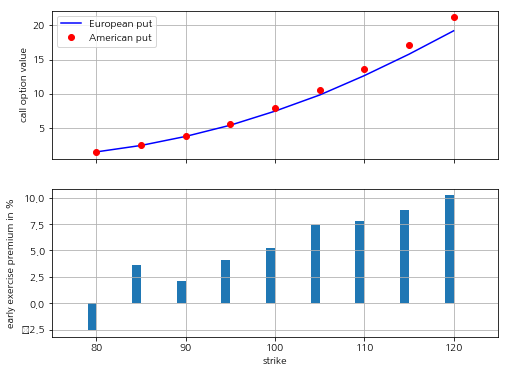

In [75]:
# title: Comparsion of European and LSM Monte Carlo estimator values
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value'); ax1.grid(True); ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike'); ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125); ax2.grid(True)

In [76]:
# 결론
# 미국 옵션의 '조기행사프리미엄'이 10% 정도 상슨한다

<br></br>
## 7 위험측도
위험관리를 위한 위험측도를 계산 및 추정

Value-at-Risk (VAR) : 확률적 신뢰도 하에서 특정시간내 발생가능한 손실가능금액

### 01 Value-at-Risk 1
BSM 기반하 30일간의 미래 주가를 예측

In [77]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

# BSM 모형에 기반한 30일간의 미래주가를 예측
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * np.random.standard_normal(I))
R_gbm = np.sort(ST - S0)
R_gbm.shape

(10000,)

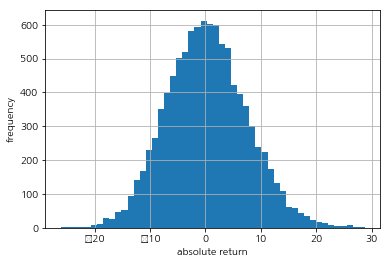

In [78]:
# 기하 브라운 운동모형의 수익분포 (30일)
plt.hist(R_gbm, bins = 50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [79]:
import scipy.stats as scs

# 신뢰구간 list 0.01 ~ 10.0 : 99% ~ 90%
# cf) 0.1 : 100 - 0.01 = 99%
# cf) 10. : 100 - 10   = 90%
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]  

In [80]:
# 신뢰구간에 따른 Var 값을 자동으로 계산
# scs.scoreatpercentile(시뮬레이션결과, 원하는 신뢰구간)
var = scs.scoreatpercentile(R_gbm, percs)  
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           26.072
           99.90           20.175
           99.00           15.753
           97.50           13.265
           95.00           11.298
           90.00            8.942


### 02 Value-at-Risk 2
머튼의 점프확산모형(3-04) Jump-Diffusion 시뮬레이션

In [81]:
# 점프확산모형의 30일 수익분포
dt = 30. / 365 / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = np.random.standard_normal((M + 1, I))
sn2 = np.random.standard_normal((M + 1, I))
poi = np.random.poisson(lamb * dt, (M + 1, I))

In [82]:
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

R_jd = np.sort(S[-1] - S0)

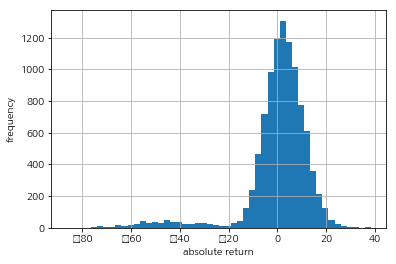

In [83]:
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)

In [84]:
# 결론
# 점프요인이 '-'이므로, 시뮬레이션손익은 양봉과 유사한 분포를 갖는다
# 정규분포상 좌측으로 치우친 결과를 얻을 수 있다 (Tail Risk에 취약)

In [85]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           75.029
           99.90           71.833
           99.00           55.901
           97.50           45.697
           95.00           25.993
           90.00            8.773


In [86]:
# 99.99% 의 VAR 값은 1번 모델에 비해 3배이상 크다
# 이후 의 신뢰구간의 값은 1번모델과 동일하게 수렴한다
# 99.99%의 값이 크므로, Tail Risk에는 취약한 단점을 갖는다.

(-90.277619106623035, 0.0)

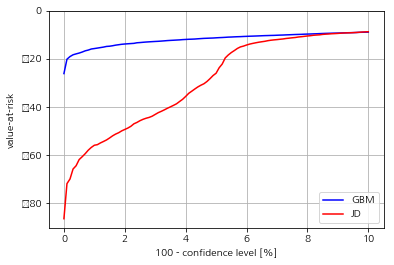

In [87]:
# GBM (브라운모델)과 JD (점프모델)의 비교
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.legend(loc=4); plt.grid(True);plt.ylim(ymax=0.0)

### 02 Credit Value Adjustment 1
신용 VaR에서 파생한 위험측정모델

상대방의 파산위험을 반영한 위험측도

In [88]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

# BSM 시뮬레이션
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * np.random.standard_normal(I))

In [89]:
L = 0.5                              # 손실수준
p = 0.01                             # 상대방의 1년 부도확률
D = np.random.poisson(p * T, I)      # 부도 시나리오생성 (포아송 분포)
D = np.where(D > 1, 1, D)            # 단 시나리오상 부도는 1번만 일어난다
np.exp(-r * T) * 1 / I * np.sum(ST)  # 부도가 안일어나는 경우, 위험중립측도하 주가지수

99.981825216842921

In [90]:
# VAR 계산 : 신용위험을 조정
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * ST); print(CVaR)
# CVA와의 비교군 : 본자산가격 S0와 신용 VAR을 뺸 나머지
S0_adj = S0 - CVaR; print(S0_adj)

0.515201113416
99.4847988866


In [91]:
# CVA 계산 : 신용위험을 조정한, 자산의 현재가치
S0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * ST)
S0_CVA

99.466624103426781

In [92]:
# BSM 모형에 부도위험 적용
# 전체 100,000 반복중 , 964번째 부도가 발생
# 해석 : 약 1%의 위험구간에 부도가 일어남을 수치로 확인
# p = 0.01 설정과 유효한 결론이 도출

np.count_nonzero(L * D * ST)

1031

(0.0, 175)

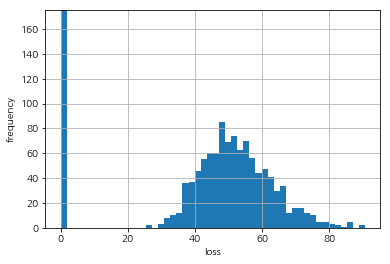

In [93]:
# 위험중립하 부도로 인한 손실
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss'); plt.ylabel('frequency')
plt.grid(True); plt.ylim(ymax=175)

### 03 Credit Value Adjustment 3
유러피안 콜옵션에 위험모델 적용

In [94]:
# BSM 시뮬레이션결과
K = 100.
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
C0

10.427336109660052

In [95]:
# 손실수준을 고려한 신용 VaR
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * hT)
CVaR

0.053822578452208093

In [96]:
# 위험조정 옵션가격
C0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * hT)
C0_CVA

10.373513531207843

In [97]:
print('손실횟수 : ', np.count_nonzero(L * D * hT))  
print('부도횟수 : ',np.count_nonzero(D))
print('payoff가 없는구간 : ',I - np.count_nonzero(hT))

손실횟수 :  582
부도횟수 :  1031
payoff가 없는구간 :  43995


In [98]:
# 결론
# 자산에 비해 옵션은 '손실횟수'값이 절반밖에 안된다
# 이는 옵션의 기간만료로 인한 소멸이 반영된 결과이다

(0.0, 350)

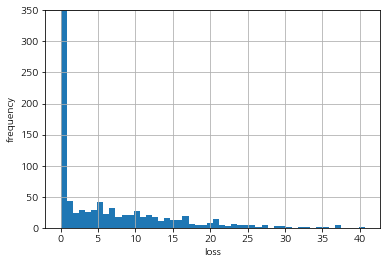

In [99]:
plt.hist(L * D * hT, bins=50)
plt.xlabel('loss'); plt.ylabel('frequency')
plt.grid(True); plt.ylim(ymax=350)

In [100]:
# 결과
# Numpy의 함수를 사용하면
# 몬테카를로 시뮬레이션 공식을 대다수 적용이 가능하다